In [7]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


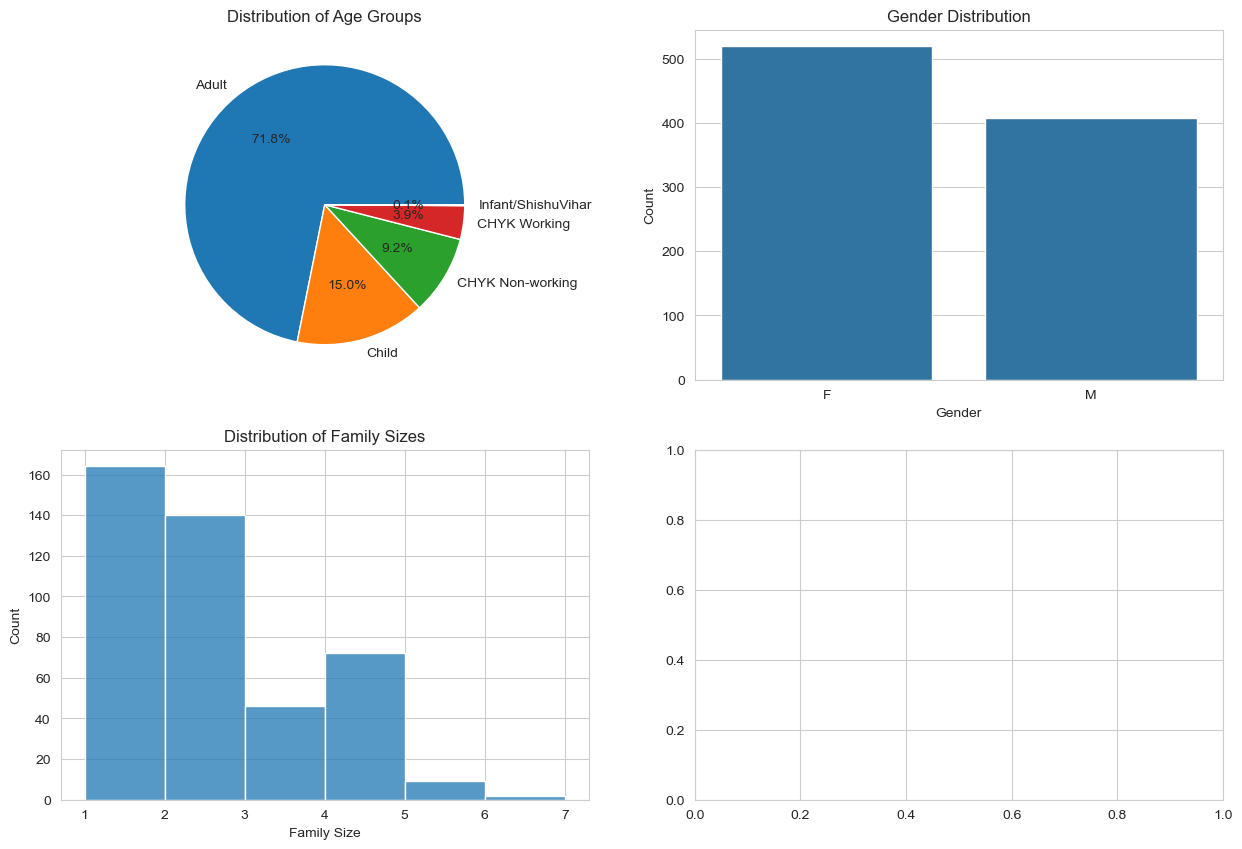

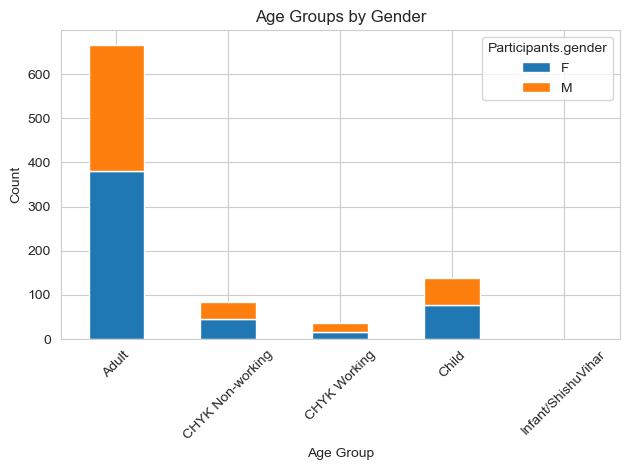


Summary Statistics:
Total number of participants: 927
Number of unique families: 433

Average family size: 2.1

Age Group Distribution:
Adult                 666
Child                 139
CHYK Non-working       85
CHYK Working           36
Infant/ShishuVihar      1
Name: Age Group, dtype: int64

Gender Distribution:
F    519
M    408
Name: Participants.gender, dtype: int64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('data/participants2_cleaned.csv')

# Set style for better visualization
sns.set_style("whitegrid")

# Create figure with subplots
fig = plt.figure(figsize=(15, 10))

# 1. Age Group Distribution
plt.subplot(2, 2, 1)
age_counts = df['Age Group'].value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')

# 2. Gender Distribution
plt.subplot(2, 2, 2)
gender_counts = df['Participants.gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# 3. Family Size Distribution
plt.subplot(2, 2, 3)
family_sizes = df.groupby('Family ID').size()
sns.histplot(family_sizes, bins=range(1, max(family_sizes)+2))
plt.title('Distribution of Family Sizes')
plt.xlabel('Family Size')
plt.ylabel('Count')

# 4. Age Group by Gender
plt.subplot(2, 2, 4)
age_gender = pd.crosstab(df['Age Group'], df['Participants.gender'])
age_gender.plot(kind='bar', stacked=True)
plt.title('Age Groups by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print some summary statistics
print("\nSummary Statistics:")
print(f"Total number of participants: {len(df)}")
print(f"Number of unique families: {df['Family ID'].nunique()}")
print(f"\nAverage family size: {len(df)/df['Family ID'].nunique():.1f}")
print("\nAge Group Distribution:")
print(df['Age Group'].value_counts())
print("\nGender Distribution:")
print(df['Participants.gender'].value_counts())
